## 🔎 Exploratory analysis of [Fake News](https://www.kaggle.com/datasets/algord/fake-news) Dataset

In [2]:
import pandas as pd

# https://www.kaggle.com/datasets/algord/fake-news
df = pd.read_csv("../../local_datasets/FakeNewsNet.csv", sep=",")

### 🧾 Information about the dataset

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23196 entries, 0 to 23195
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   title          23196 non-null  object
 1   news_url       22866 non-null  object
 2   source_domain  22866 non-null  object
 3   tweet_num      23196 non-null  int64 
 4   real           23196 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 906.2+ KB


### 🧾 Size of the dataset (rows and columns)

In [4]:
print("Size:", df.shape)

Size: (23196, 5)


### 📃 Columns description in the dataset
- `title`: the title of the news article.
- `news_url`: the URL of the news article.
- `source_domain`: the website from which the news article originates.
- `tweet_num`: number of retweets the news article has received.
- `real`: a binary label indicating whether the article is real (1) or fake (0).

### 📃 Check for missing values in the dataset

Let's check if there are any missing values in the dataset.

In [5]:
print(df.isnull().sum())

title              0
news_url         330
source_domain    330
tweet_num          0
real               0
dtype: int64


### 📃 Check for duplicates

In [16]:
print("Number of duplicate rows:", df.duplicated().sum())

Number of duplicate rows: 136


### 🧾 Number of true vs fake news

We can check the number of true vs fake news in the dataset, in order to see if the dataset is balanced or not.

In [6]:
real_news_count = df['real'].value_counts()[1]
fake_news_count = df['real'].value_counts()[0]
real_news_percent = (real_news_count / (real_news_count + fake_news_count)) * 100
fake_news_percent = (fake_news_count / (real_news_count + fake_news_count)) * 100
print("Number of real news articles:", real_news_count, "({:.2f}%)".format(real_news_percent))
print("Number of fake news articles:", fake_news_count, "({:.2f}%)".format(fake_news_percent))


Number of real news articles: 17441 (75.19%)
Number of fake news articles: 5755 (24.81%)


The difference between real and fake news articles is important. The dataset is not balanced.

Here a graphical representation of the number of true vs fake news articles.

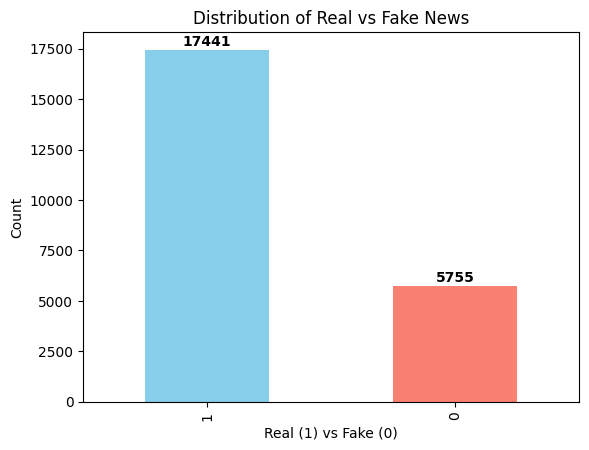

In [7]:
import matplotlib.pyplot as plt

ax = df["real"].value_counts().plot(kind="bar", color=["skyblue", "salmon"])
plt.title("Distribution of Real vs Fake News")
plt.xlabel("Real (1) vs Fake (0)")
plt.ylabel("Count")

for p in ax.patches:
    ax.text(
        p.get_x() + p.get_width() / 2, # type: ignore
        p.get_height() + 50, # type: ignore
        f"{int(p.get_height())}", # type: ignore
        ha="center",
        va="bottom",   
        fontsize=10,
        fontweight="bold",
        color="black"
    )
    
plt.show()

Let's now examine whether the veracity of a news is influenced by other variables. For example, let's compare the average number of retweets depending on whether the news is false or not.

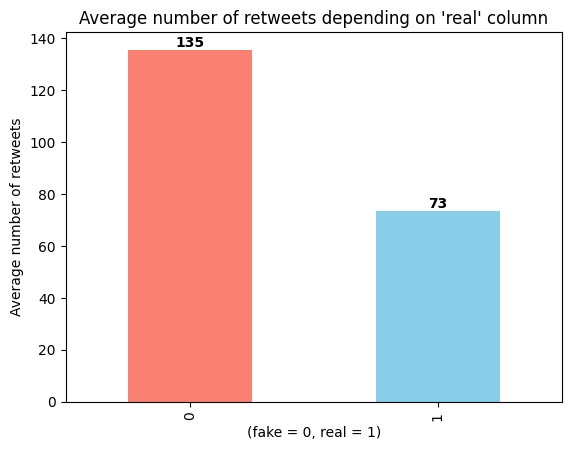

In [11]:
import matplotlib.pyplot as plt

mean_retweets = df.groupby('real')['tweet_num'].mean().sort_index()

ax = mean_retweets.plot(kind='bar', color=['salmon', 'skyblue'][:len(mean_retweets)])
plt.xlabel("(fake = 0, real = 1)")
plt.ylabel("Average number of retweets")
plt.title("Average number of retweets depending on 'real' column")

for p in ax.patches:
    ax.text(
        p.get_x() + p.get_width() / 2, # type: ignore
        p.get_height(), # type: ignore
        f"{int(p.get_height())}", # type: ignore
        ha="center",
        va="bottom",   
        fontsize=10,
        fontweight="bold",
        color="black"
    )

plt.show()

This plot shows that the number of retweets is, on average, higher for real news.

### 📏 Analysis of title length distribution

Let's analyze the distribution of title lengths and see if there's any difference between real and fake news in terms of title length.

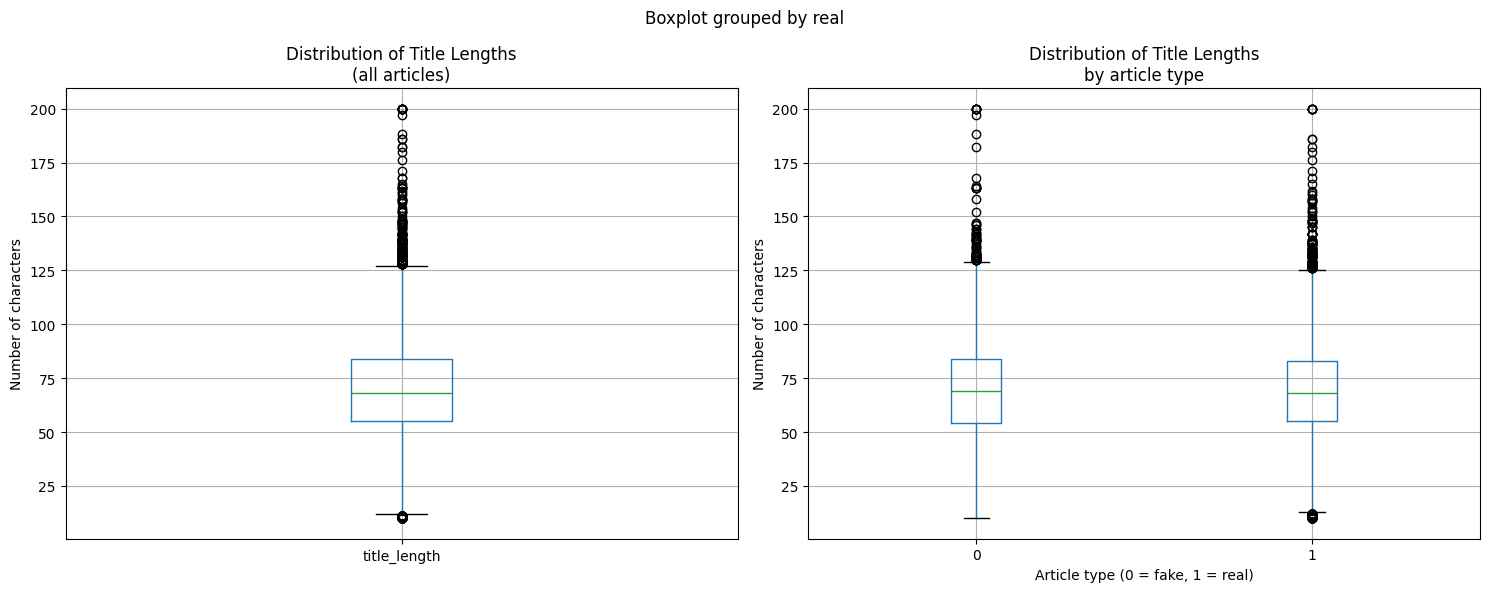


Descriptive statistics of title lengths by article type:
        count       mean        std   min   25%   50%   75%    max
real                                                              
0      5755.0  68.831798  23.841752  10.0  54.0  69.0  84.0  200.0
1     17440.0  68.113360  23.009128  10.0  55.0  68.0  83.0  200.0


In [9]:
import matplotlib.pyplot as plt
NUM_CHAR = "Number of characters"

df['title_length'] = df['title'].str.len()
df = df[df['title_length'] < 250]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

df.boxplot(column='title_length', ax=ax1)
ax1.set_title('Distribution of Title Lengths\n(all articles)')
ax1.set_ylabel(NUM_CHAR)

df.boxplot(column='title_length', by='real', ax=ax2)
ax2.set_title('Distribution of Title Lengths\nby article type')
ax2.set_xlabel("Article type (0 = fake, 1 = real)")
ax2.set_ylabel(NUM_CHAR)

plt.tight_layout()
plt.show()

print("\nDescriptive statistics of title lengths by article type:")
print(df.groupby('real')['title_length'].describe())

### 📏 Analysis of URL length distribution

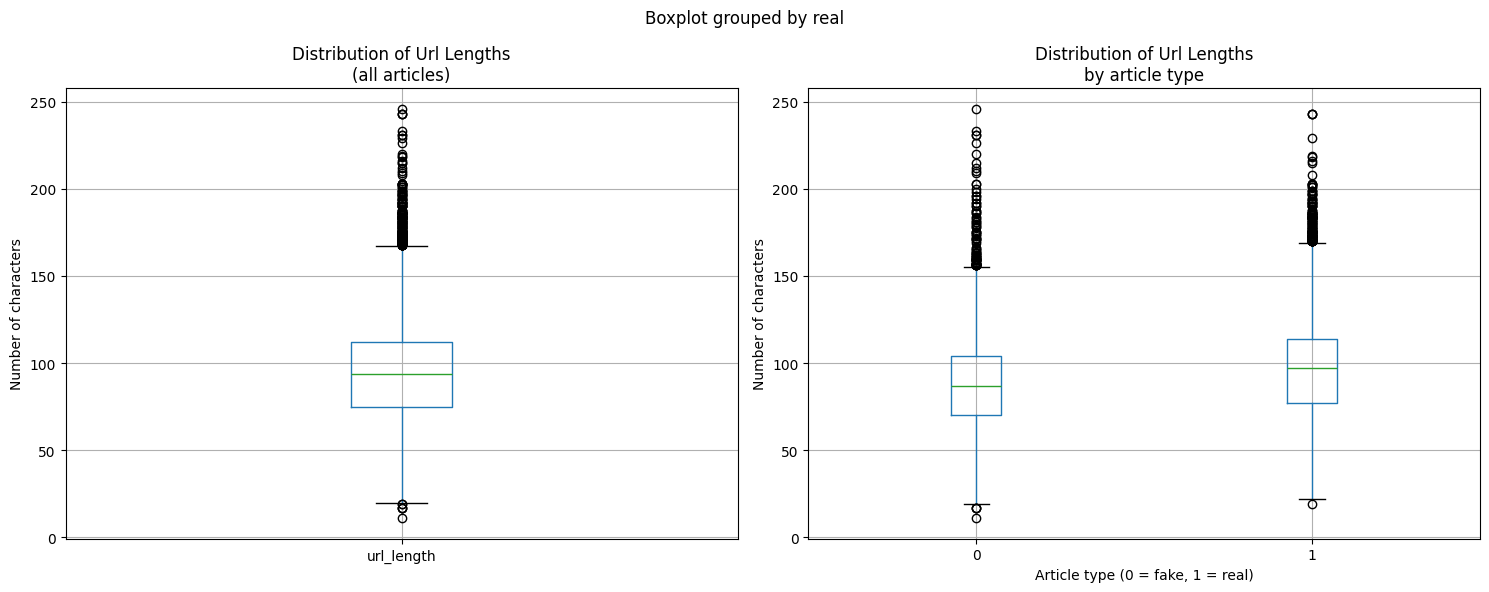


Descriptive statistics of url lengths by article type:
        count       mean        std   min   25%   50%    75%    max
real                                                               
0      5493.0  87.649372  28.855255  11.0  70.0  87.0  104.0  246.0
1     17364.0  96.483529  27.580306  19.0  77.0  97.0  114.0  243.0


In [15]:
df['url_length'] = df['news_url'].str.len()
df = df[df['url_length'] < 250]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

df.boxplot(column='url_length', ax=ax1)
ax1.set_title('Distribution of Url Lengths\n(all articles)')
ax1.set_ylabel('Number of characters')

df.boxplot(column='url_length', by='real', ax=ax2)
ax2.set_title('Distribution of Url Lengths\nby article type')
ax2.set_xlabel("Article type (0 = fake, 1 = real)")
ax2.set_ylabel('Number of characters')

plt.tight_layout()
plt.show()

print("\nDescriptive statistics of url lengths by article type:")
print(df.groupby('real')['url_length'].describe())

### 🧾 Conclusion and main outcomes
In this notebook, we have explored the Fake News dataset. We have achieved the following outcomes:
- The dataset is very big, containing almost 23k articles.
- The dataset is not balanced, with 17.364 fake news vs 5.493 real news articles.
- Checked the link with another feature
- Checked the distribution of Title and URL Lengths

The next step is to pre-process the dataset in order to prepare it for training and evaluation of the chatbots.